## Social dimensions of Eaton and Palisades fires


In [1]:
# Import packages
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx

In [2]:

# ------ IMPORT DATASETS ------

fp = os.path.join('data', 'eaton_fire_perimeter', 'Eaton_Perimeter_20250121.shp')
eaton_fire = gpd.read_file(fp)

fp = os.path.join('data', 'palisades_fire_perimeter', 'Palisades_Perimeter_20250121.shp')
palisades_fire = gpd.read_file(fp)

fp = os.path.join('data', 'landsat8-2025-02-23-palisades-eaton.nc')
landsat = xr.open_dataset(fp)

fp_eji = os.path.join('data', 'EJI_2024_California', 'EJI_2024_California.gdb')
eji = gpd.read_file(fp_eji)

## 1. Metadata Exploration
 
- E_RENTER : Percentage of housing units that are renter occupied
- E_UNINSUR : Percentile rank of the percentage of persons who are uninsured
- RPL_EBM_DOM1 : Percentile rank of domain consisting of ozone, PM2.5, air toxics cancer risk, and diesel particulate matter.


## 2. Polygon intersersection

In [3]:
# Change CRS of eji
eji = eji.to_crs(palisades_fire.crs)

assert eji.crs == palisades_fire.crs
assert eji.crs == eaton_fire.crs

In [4]:
# Join the Palisades perimeter and eji data and make sure CRS match
pali_eji = gpd.sjoin(eji, palisades_fire)

Create an exploratory map showing

- the census tracts that intersect the Palisades fire perimeter and
- the Palisades fire perimeter.

Text(0.5, 1.0, 'Census tracts overlapping palisades fire perimeter')

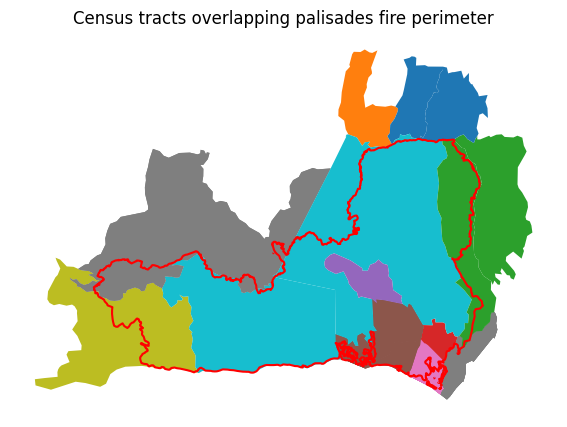

In [5]:
fig, ax = plt.subplots(figsize=(11, 5))
ax.axis('off')

pali_eji.plot('TRACTCE', 
              ax = ax)

palisades_fire.plot(ax=ax,
                    color = 'none', 
                    edgecolor='red',
                    linewidth = 1.5)

plt.title('Census tracts overlapping palisades fire perimeter')

Intersects makes the inclusion of census tracts that are even partially within the fire perimeter. Census tracts are larger than the perimeter of the palisades fire. 

## Eaton fire perimeter and census tracts

In [6]:
# Join the Eaton perimeter and eji data and make sure CRS match
eaton_eji = gpd.sjoin(eji, eaton_fire)

Text(0.5, 1.0, 'Census tracts overlapping Eaton fire perimeter')

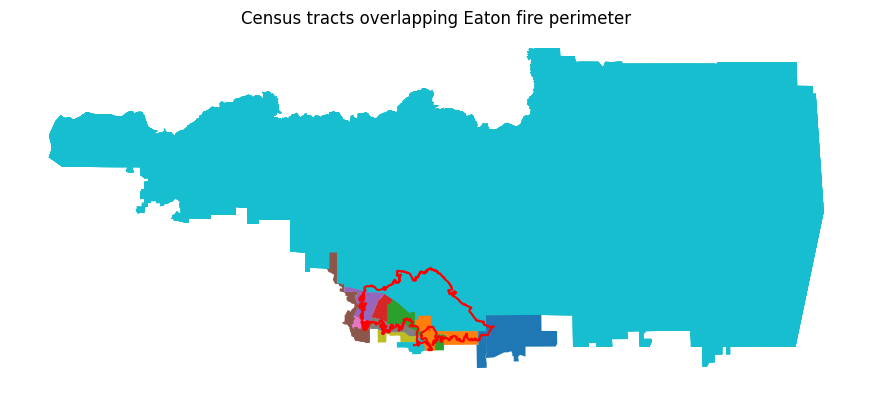

In [7]:
fig, ax = plt.subplots(figsize=(11, 5))
ax.axis('off')

eaton_eji.plot('TRACTCE', 
              ax = ax)

eaton_fire.plot(ax=ax,
                    color = 'none', 
                    edgecolor='red',
                    linewidth = 1.5)

plt.title('Census tracts overlapping Eaton fire perimeter')

The census tracts are much larger than the Eaton fire perimeter. The large census tract is part of the Los Angeles National Forest hence its size. 

## Polygon clipping

Clip the census tracts to the Palisades fire perimeter using `geopandas.clip().`

In [8]:
palisades_clip = gpd.clip(eji, palisades_fire)

In [9]:
eaton_clip = gpd.clip(eji, eaton_fire)

Text(0.5, 1.0, 'Census tracts overlapping Palisades fire perimeter')

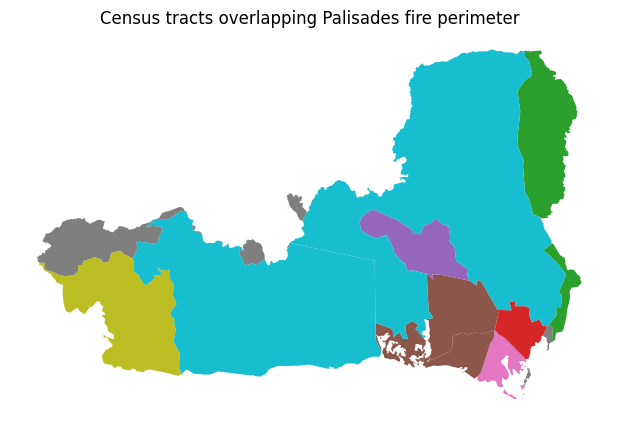

In [10]:
fig, ax = plt.subplots(figsize=(11, 5))
ax.axis('off') 

palisades_clip.plot('TRACTCE',
                    ax = ax)


plt.title('Census tracts overlapping Palisades fire perimeter')

Text(0.5, 1.0, 'Census tracts overlapping Eaton fire perimeter')

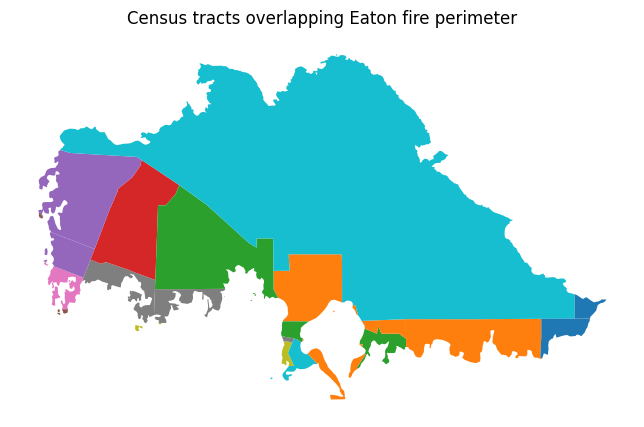

In [11]:
fig, ax = plt.subplots(figsize=(11, 5))
ax.axis('off')

eaton_clip.plot('TRACTCE', 
                ax = ax)
plt.title('Census tracts overlapping Eaton fire perimeter')

Clipping selects only the areas burned while join contains the entirety of the intersects are included. 

## Visualize fire perimeters with a basemap

In [12]:
palisades_clip.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

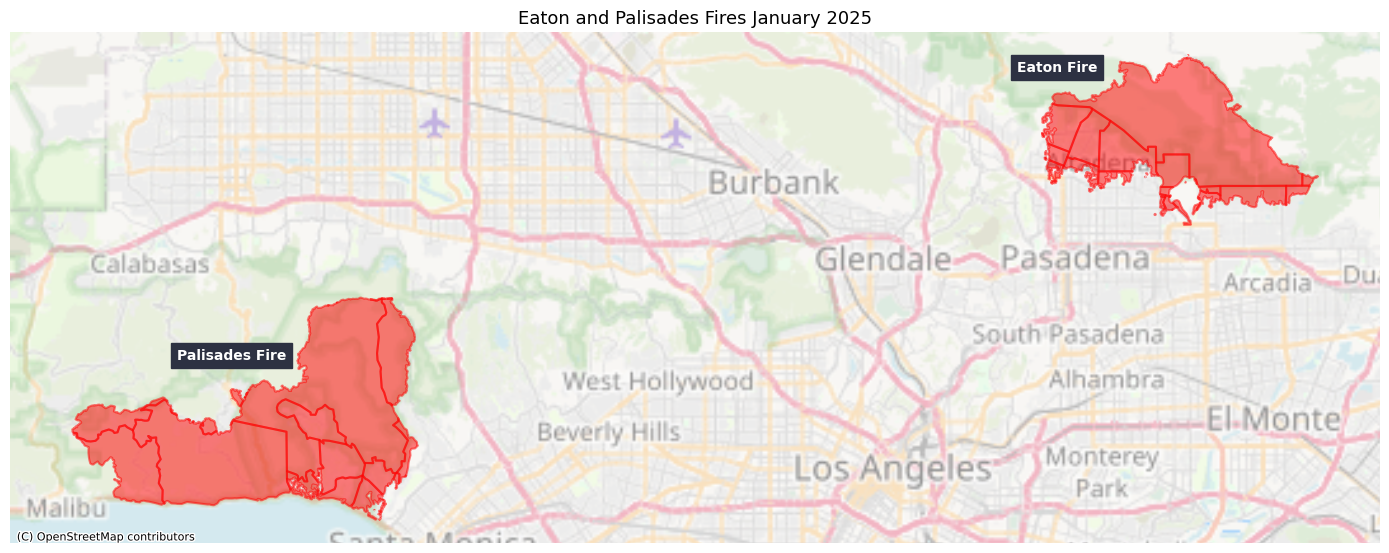

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
ax.axis('off')

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
palisades_clip.plot(ax=ax,
                    color = 'red', 
                    edgecolor='red',
                    linewidth = 1.5,
                    alpha = 0.5)

eaton_clip.plot(ax = ax, 
                color = 'red', 
                edgecolor='red',
                linewidth = 1.5,
                alpha = 0.5)

# Add an Eaton Fire label
plt.figtext(x = .73,
            y = .68,
            s ="Eaton Fire",
            weight = 'bold',
           color = "white", 
           backgroundcolor =  "#2D3142")

# Add a Palisade Fire label
plt.figtext(x = .13,
            y = .44,
            s ="Palisades Fire",
            weight = 'bold',
           color = "white", 
           backgroundcolor =  "#2D3142")

# Add a title 
ax.set_title('Eaton and Palisades Fires January 2025', fontsize = 13)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha = .5)


plt.tight_layout()
plt.show()

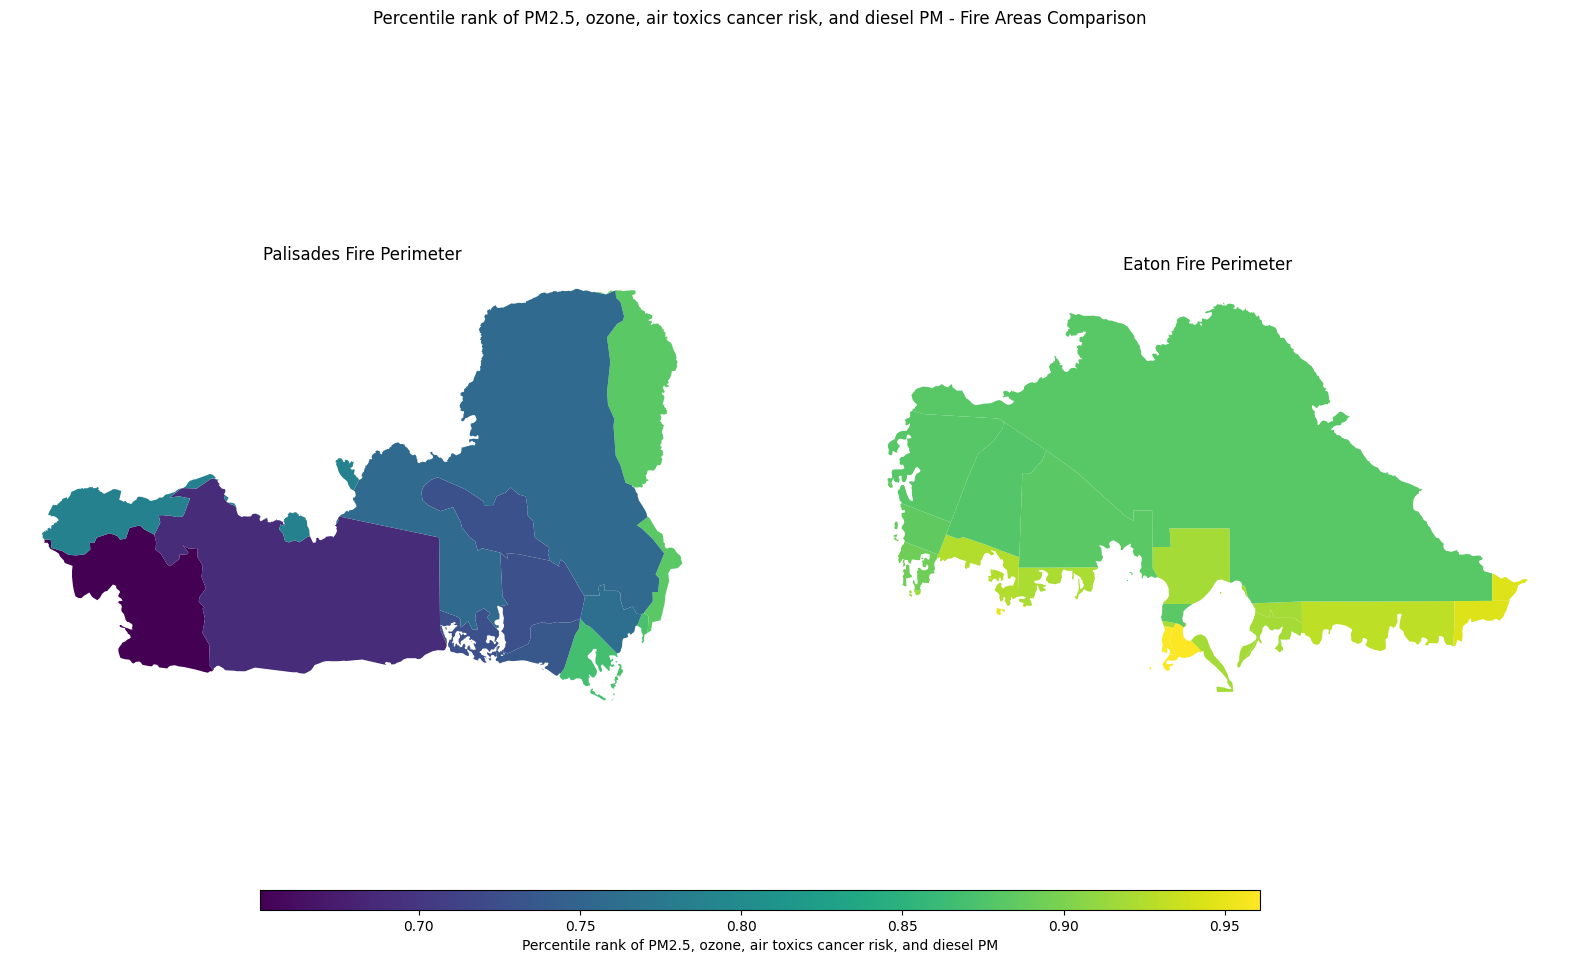

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# RPL_EBM_DOM1 : Percentile rank of domain consisting of ozone, PM2.5, air toxics cancer risk, and diesel particulate matter.
eji_variable = 'RPL_EBM_DOM1'

# Find common min/max for legend range
vmin = min(palisades_clip[eji_variable].min(), eaton_clip[eji_variable].min())
vmax = max(palisades_clip[eji_variable].max(), eaton_clip[eji_variable].max())

# Plot census tracts within Palisades perimeter
palisades_clip.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
)
ax1.set_title('Palisades Fire Perimeter')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eaton_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
)
ax2.set_title('Eaton Fire Perimeter')
ax2.axis('off')

# Add overall title
fig.suptitle('Percentile rank of PM2.5, ozone, air toxics cancer risk, and diesel PM - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Percentile rank of PM2.5, ozone, air toxics cancer risk, and diesel PM')

plt.show()